In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
#read the file
df = pd.read_csv('/content/coronavirus.csv')

In [ ]:
#Display attributes in the data set-10 samples.
df.head(10)

,date,province,country,lat,long,type,cases
0,22-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
1,23-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
2,24-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
3,25-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
4,26-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
5,27-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
6,28-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
7,29-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
8,30-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
9,31-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0


In [ ]:
#Describe the attributes name
df.columns

Index(['date', 'province', 'country', 'lat', 'long', 'type', 'cases'], dtype='object')

In [ ]:
# Drop rows with null values
df.dropna(inplace=True)
# Remove rows with negative values in the 'cases' column
df = df[df['cases'] >= 0]
# Display the first few rows of the cleaned dataframe
print(df.head(100))

             date province country      lat      long       type  cases
34780  22-01-2020  Alberta  Canada  53.9333 -116.5765  confirmed      0
34781  23-01-2020  Alberta  Canada  53.9333 -116.5765  confirmed      0
34782  24-01-2020  Alberta  Canada  53.9333 -116.5765  confirmed      0
34783  25-01-2020  Alberta  Canada  53.9333 -116.5765  confirmed      0
34784  26-01-2020  Alberta  Canada  53.9333 -116.5765  confirmed      0
...           ...      ...     ...      ...       ...        ...    ...
34876  27-04-2020  Alberta  Canada  53.9333 -116.5765  confirmed    216
34877  28-04-2020  Alberta  Canada  53.9333 -116.5765  confirmed    154
34878  29-04-2020  Alberta  Canada  53.9333 -116.5765  confirmed    315
34879  30-04-2020  Alberta  Canada  53.9333 -116.5765  confirmed    190
34880  01-05-2020  Alberta  Canada  53.9333 -116.5765  confirmed    218

[100 rows x 7 columns]


In [ ]:
#count no of values
df['cases'].count()

42985

In [ ]:
df['cases'].min()

0

In [ ]:
#max
df['cases'].max()

14840

In [ ]:
#mean
df['cases'].mean()

8.113574502733512

In [ ]:
#datatype
data_type = df['cases'].dtype
print (data_type)

int64


In [ ]:
# find the range of a column
df['cases'].max() - df['cases'].min()

14840

In [ ]:
df.describe()

,lat,long,cases
count,42985.000000,42985.000000,42985.000000
mean,22.296418,43.604577,8.113575
std,27.490625,91.140007,112.045229
min,-51.796300,-135.000000,0.000000
25%,14.641500,-62.187366,0.000000
50%,27.614000,102.710300,0.000000
75%,39.549000,116.414200,0.000000
max,71.706900,165.618042,14840.000000


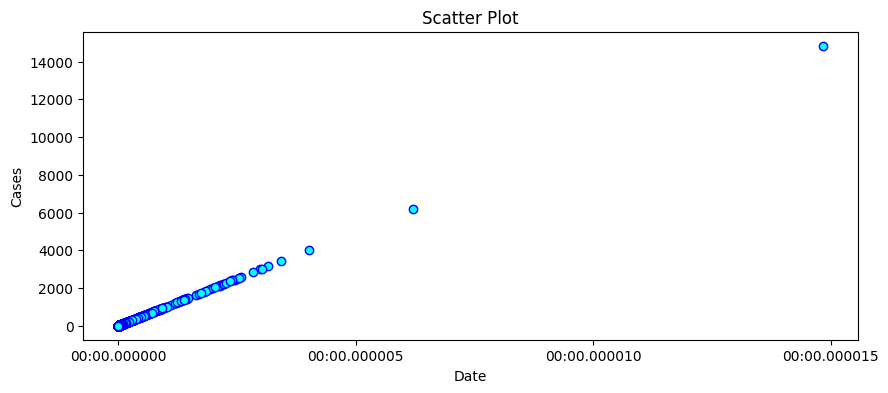

In [ ]:
# Convert the 'SaleDate' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a scatter plot of SalePrice vs SaleDate
plt.figure(figsize=(10, 4))
plt.scatter(df['date'], df['cases'], color = 'cyan', edgecolor = 'blue')
plt.title('Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

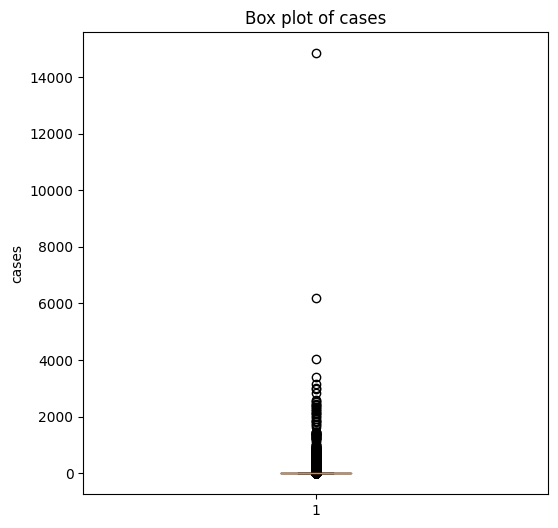

In [ ]:
# create a box plot of SalePrice
plt.figure(figsize=(6, 6))
plt.boxplot(df['cases'])
plt.title('Box plot of cases')
plt.ylabel('cases')
plt.show()

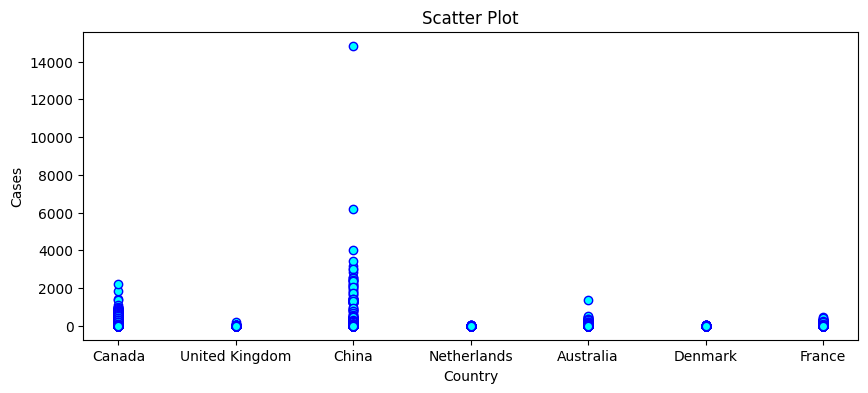

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 4))
plt.scatter(df['country'], df['cases'], color = 'cyan', edgecolor = 'blue')
plt.title('Scatter Plot')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()

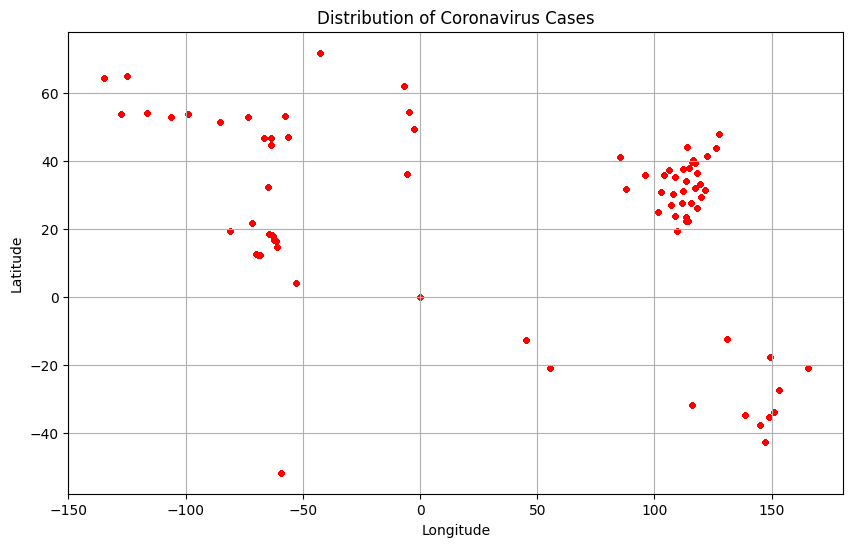

In [ ]:
# Scatter plot to visualize the distribution of cases
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], c='red', alpha=0.5, marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Coronavirus Cases')
plt.grid(True)
plt.show()

We can observe from the above graph (cases vs latitude) that the regions with latitude in the range -10 to -20 had a lot of cases, signifying that people were most affected in the torrid zone.


We can observe from the above graph (cases vs longitude) that the regions with longitude in the range -50 to -100 had a lot of cases, signifying that people were most affected in the United States of America, which is a country falling in this longitude range.

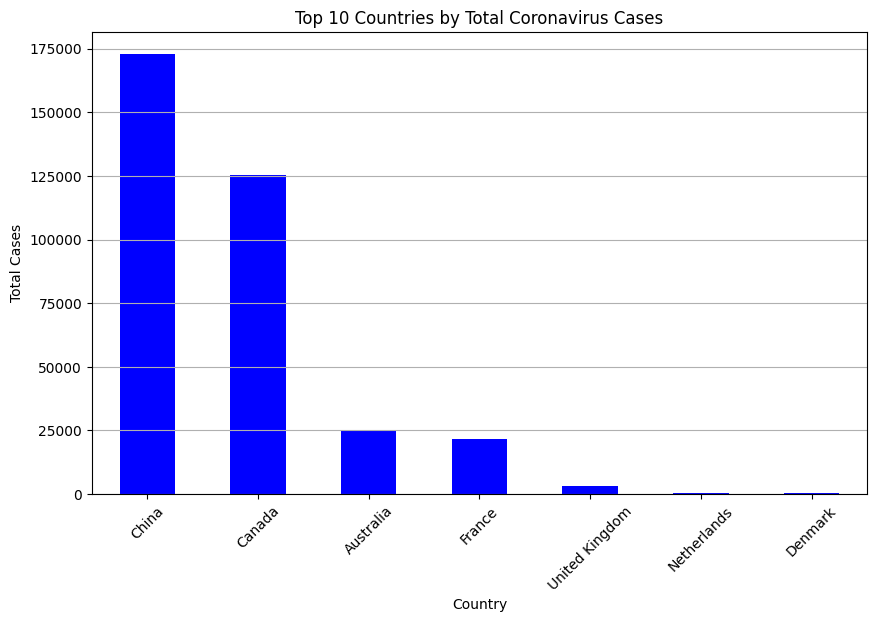

In [ ]:
# Bar chart to display the number of cases per country
cases_per_country = df.groupby('country')['cases'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
cases_per_country.plot(kind='bar', color='blue')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 Countries by Total Coronavirus Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<Axes: ylabel='cases'>

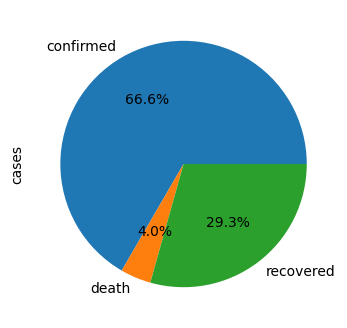

In [ ]:
df.groupby('type')['cases'].sum().plot(kind="pie",autopct='%1.1f%%',figsize=(20,4))

There are about 16 Million cases worldwide as of 27 July 2020 (61.7%)


About 10 Million of them have recovered (35.8%) .


However, there are less than 1 Million deaths worldwide. Which tells that the COVID-19 is infectious, but not always fatal (2.4%) .